In [1]:
conda env list

# conda environments:
#
NewEnv                   /home/achartra/.conda/envs/NewEnv
PINNICLEenv           *  /home/achartra/.conda/envs/PINNICLEenv
allison                  /home/achartra/.conda/envs/allison
baseclone                /home/achartra/.conda/envs/baseclone
base                     /panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05
earthml                  /panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05/envs/earthml
esmvaltool               /panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05/envs/esmvaltool
gdalNgmt                 /panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05/envs/gdalNgmt
ilab-pytorch             /panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05/envs/ilab-pytorch
ilab-tensorflow          /panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05/envs/ilab-tensorflow
ml                       /panfs/ccds02/app/modules/anaconda/platform/x86_64/rhe

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [1]:
#### Testing PINNICLE
# Infer basal friction coefficients using SSA

import pinnicle as pinn
import numpy as np
import deepxde as dde
import matplotlib.pyplot as plt
from datetime import datetime

# Set up some configurations
dde.config.set_default_float('float64')
dde.config.disable_xla_jit()
dde.config.set_random_seed(1234)


2024-11-26 14:07:32.941311: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 14:07:33.021440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732648053.039669 2242001 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732648053.045197 2242001 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 14:07:33.065372: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Set the default float type to float64


In [ ]:
# experiment.load_model(path='./PINNs/Ryder_test_I20240729_140936_P20240729_154130')
# experiment = pinn.PINN(loadFrom='./PINNs/Ryder_test_I20240729_140936_P20240731_144431')

experiment.load_model(path='./PINNs/Ryder_test_I20240729_140936_P20240731_141329')
new_folder = experiment.params.
experiment.update_parameters({"save_path": new_folder})

In [ ]:
print(experiment.params)

In [2]:
# Load the correct data

issm_filename = "Ryder_test_I22-Nov-2024_17-41-27"
datestr = datetime.now().strftime("%d-%b-%y_%H-%M-%S")

issm_pinn_path = issm_filename + "_P" + datestr
# General parameters for training
# Setting up dictionaries
# order doesn't matter, but keys DO matter
hp = {}

# Load data ? 
# In data_size, each key:value pair defines a variable in the training. 
# if the key is not redefined in name_map, then it will be used as default 
# or set in the physics section above. The value associated with the key 
# gives the number of data points used for training.
# If the value is set to None, then only Dirichlet BC around the domain 
# boundary will be used for the corresponding key. If the variable is included
# in the training, but not given in data_size, then there will be no data for this variable in the training
issm = {}
issm["data_path"] = "./Models/" + issm_filename + ".mat"
issm["data_size"] = {"u":4000, "v":4000, "s":4000, "H":None, "C":4000, "vel":4000}
hp["data"] = {"ISSM":issm}

hp["epochs"] = int(2e5)
hp["learning_rate"] = 0.0001
hp["loss_function"] = "MSE"
hp["save_path"] = "./PINNs/" + issm_pinn_path
hp["is_save"] = True
hp["is_plot"] = True

# Set NN architecture
hp["activation"] = "tanh"
hp["initializer"] = "Glorot uniform"
hp["num_neurons"] = 20
hp["num_layers"] = 6
hp["input"] = ['y', 'x']

# Define domain of computation
hp["shapefile"] = "./Ryder_32_09.exp"
# Define number of collocation points used to evaluate PDE residual
hp["num_collocation_points"] = 4000

# Add physics
SSA = {}
SSA["scalar_variables"] = {"B":5.278336e+07}
hp["equations"] = {"SSA":SSA}
# MOLHO = {}
# MOLHO["scalar_variables"] = {"B":5.278336e+07} #{"B":1.26802073401e+08}
# hp["equations"] = {"MOLHO":MOLHO}

# Add an additional loss function to balance the contributions between the fast flow and slow moving regions:
# vel_loss = {}
# vel_loss['name'] = "vel log"
# vel_loss['function'] = "VEL_LOG"
# vel_loss['weight'] = 2.0e-5
# hp["additional_loss"] = {"vel":vel_loss}

experiment = pinn.PINN(hp)
experiment.update_parameters(hp)
print(experiment.params) # make sure that settings are in correct spot (keys must be correct)

ERROR:root:ERROR: MATLAB type not supported: qmustatistics, (uint32)
ERROR:root:ERROR: MATLAB type not supported: lovenumbers, (uint32)
ERROR:root:ERROR: MATLAB type not supported: rotational, (uint32)
ERROR:root:ERROR: MATLAB type not supported: solidearthsettings, (uint32)
2024-11-26 14:08:26.338678: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1732648106.338901 2242001 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31134 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:61:00.0, compute capability: 7.0
ERROR:root:ERROR: MATLAB type not supported: qmustatistics, (uint32)
ERROR:root:ERROR: MATLAB type not supported: lovenumbers, (uint32)
ERROR:root:ERROR: MATLAB type not supported: rotational, (uint32)
ERROR:root:ERROR: MATLAB type not supported: solidearthsettings, (uint32)

add input transform with [ -128000. -1134000.] and [  22000. -984000.]
add output transform with [-3.1709792e-04 -3.1709792e-04 -1.0000000e+03  1.0000000e+01
  1.0000000e-02] and [3.1709792e-04 3.1709792e-04 3.6000000e+03 3.5000000e+03 1.0000000e+04]
add input transform with [ -128000. -1134000.] and [  22000. -984000.]
add output transform with [-3.1709792e-04 -3.1709792e-04 -1.0000000e+03  1.0000000e+01
  1.0000000e-02] and [3.1709792e-04 3.1709792e-04 3.6000000e+03 3.5000000e+03 1.0000000e+04]
Parameters: 
	TrainingParameter: 
		epochs:	200000
		optimizer:	adam
		loss_functions:	['MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE']
		additional_loss:	{}
		learning_rate:	0.0001
		loss_weights:	[1e-10, 1e-10, 9945192.96, 9945192.96, 1e-06, 1e-06, 1e-08]
		has_callbacks:	False
		min_delta:	None
		patience:	None
		period:	None
		checkpoint:	False
		save_path:	./PINNs/Ryder_test_I22-Nov-2024_17-41-27_P26-Nov-24_14-08-25
		is_save:	True
		is_plot:	True
	DomainParameter: 
		shapefile:	./Ryder_

Compiling model...
'compile' took 0.006445 s

Training model...

Step      Train loss                                                                Test loss                                                                 Test metric
0         [5.72e+01, 9.00e+00, 1.36e-02, 1.66e-03, 3.51e-01, 5.18e-01, 4.23e-02]    [5.72e+01, 9.00e+00, 1.36e-02, 1.66e-03, 3.51e-01, 5.18e-01, 4.23e-02]    []  
10000     [7.09e-04, 9.06e-04, 2.75e-06, 1.04e-05, 3.26e-03, 1.72e-02, 3.55e-03]    [7.09e-04, 9.06e-04, 2.75e-06, 1.04e-05, 3.26e-03, 1.72e-02, 3.55e-03]    []  
20000     [2.74e-04, 2.18e-04, 2.28e-06, 8.89e-06, 2.94e-03, 1.27e-02, 3.12e-03]    [2.74e-04, 2.18e-04, 2.28e-06, 8.89e-06, 2.94e-03, 1.27e-02, 3.12e-03]    []  
30000     [1.07e-04, 3.80e-04, 2.33e-06, 8.90e-06, 2.01e-03, 9.15e-03, 2.83e-03]    [1.07e-04, 3.80e-04, 2.33e-06, 8.90e-06, 2.01e-03, 9.15e-03, 2.83e-03]    []  
40000     [8.29e-05, 3.60e-04, 1.77e-06, 6.30e-06, 1.74e-03, 8.44e-03, 2.53e-03]    [8.29e-05, 3.60e-04, 1.77e-06

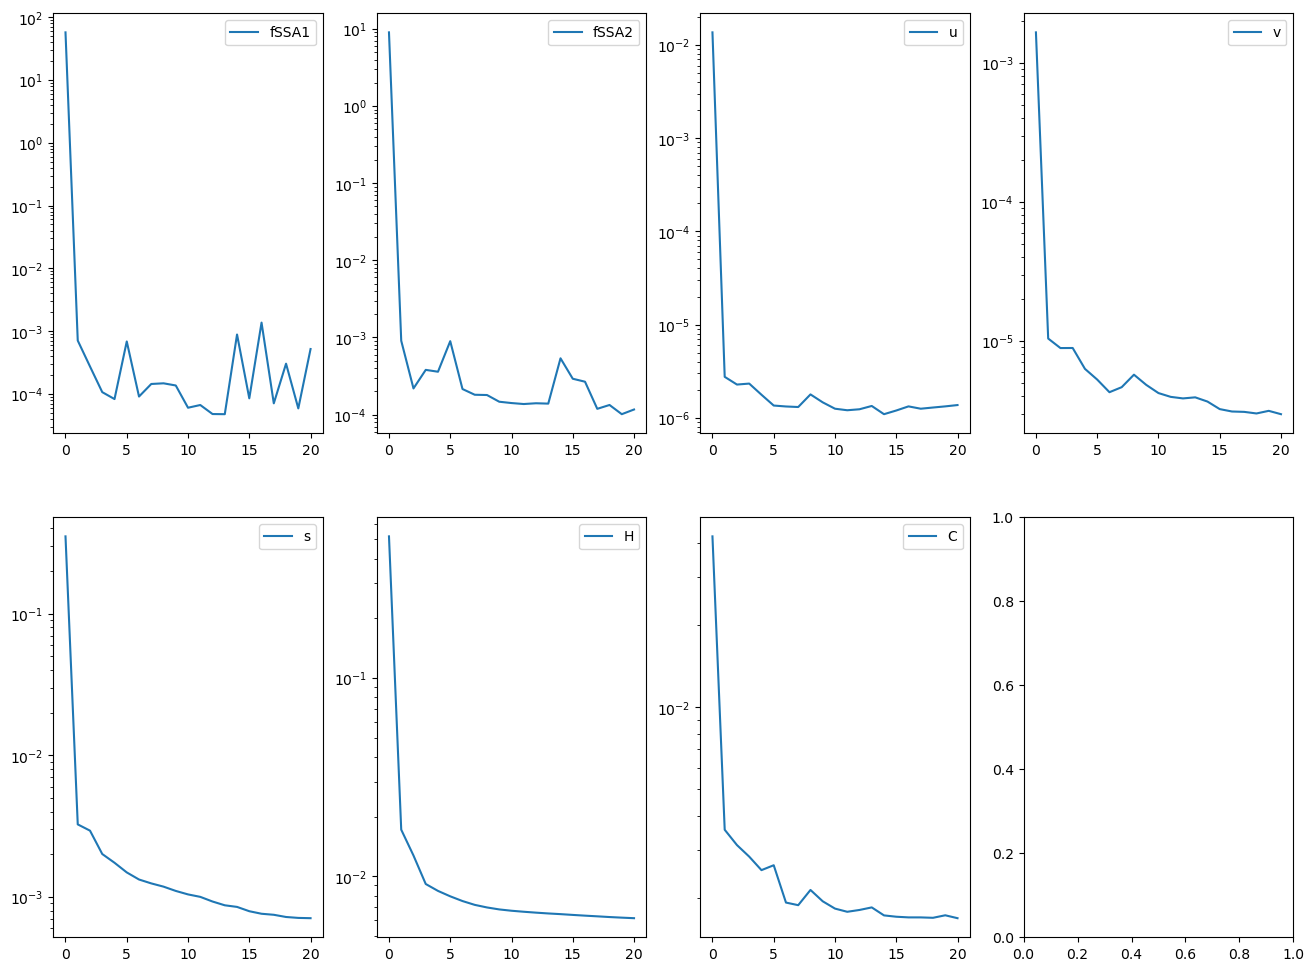

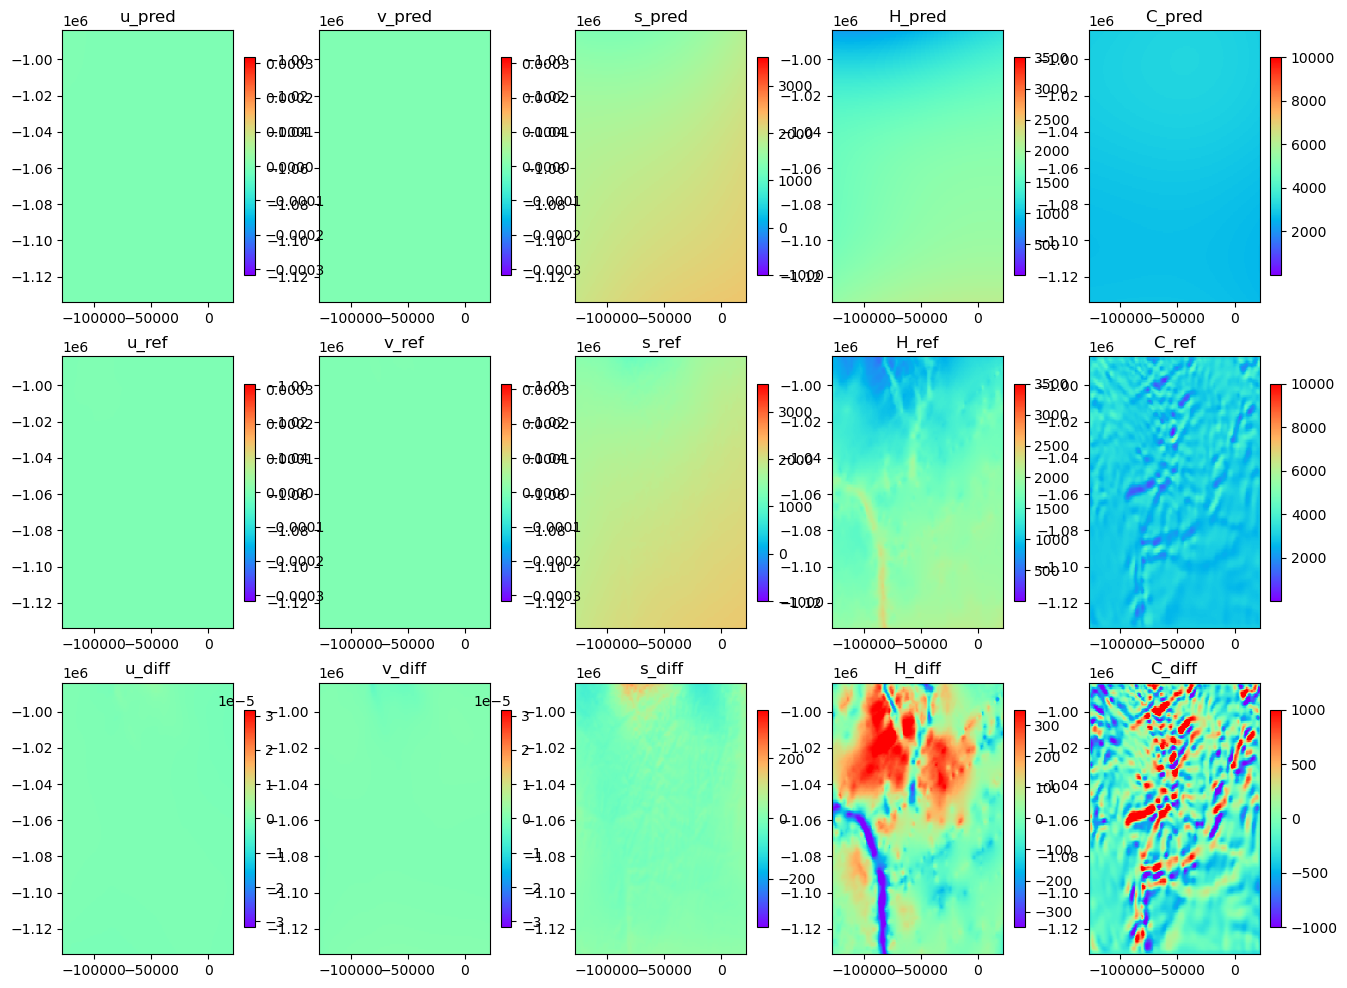

In [3]:
# Now run the PINN model
experiment.compile()

# Train
experiment.train()
# Show results
experiment.plot_predictions(X_ref=experiment.model_data.data["ISSM"].X_dict, sol_ref=experiment.model_data.data["ISSM"].data_dict)

In [4]:
print(experiment.params)

Parameters: 
	TrainingParameter: 
		epochs:	200000
		optimizer:	adam
		loss_functions:	['MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE']
		additional_loss:	{}
		learning_rate:	0.0001
		loss_weights:	[1e-10, 1e-10, 9945192.96, 9945192.96, 1e-06, 1e-06, 1e-08]
		has_callbacks:	False
		min_delta:	None
		patience:	None
		period:	None
		checkpoint:	False
		save_path:	./PINNs/Ryder_test_I22-Nov-2024_17-41-27_P26-Nov-24_14-08-25
		is_save:	True
		is_plot:	True
	DomainParameter: 
		shapefile:	./Ryder_32_09.exp
		num_collocation_points:	4000
		time_dependent:	False
		start_time:	0
		end_time:	0
	DataParameter: 
		ISSM:
			data_path:	./Models/Ryder_test_I22-Nov-2024_17-41-27.mat
			data_size:	{'u': 4000, 'v': 4000, 's': 4000, 'H': None, 'C': 4000, 'vel': 4000}
			name_map:	{'u': 'u', 'v': 'v', 's': 's', 'H': 'H', 'C': 'C', 'vel': 'vel'}
			X_map:	{'x': 'x', 'y': 'y', 't': 't'}
			source:	ISSM
			default_time:	None

	NNParameter: 
		input_variables:	['x', 'y']
		output_variables:	['u', 'v', 's', 

In [5]:
# Save model in matlab-readable format

import deepxde.backend as bkd
import hdf5storage
import scipy

resolution = 200
    # generate 200x200 mesh on the domain
X, Y = np.meshgrid(np.linspace(experiment.params.nn.input_lb[0], experiment.params.nn.input_ub[0], resolution),
                   np.linspace(experiment.params.nn.input_lb[1], experiment.params.nn.input_ub[1], resolution))
X_nn = np.hstack((X.flatten()[:,None], Y.flatten()[:,None]))
grid_size = 2.0*(((experiment.params.nn.input_ub[0] - experiment.params.nn.input_lb[0])/resolution)**2+
                 ((experiment.params.nn.input_ub[1] - experiment.params.nn.input_lb[1])/resolution)**2)**0.5
if bkd.backend_name == "pytorch":
    grid_size = bkd.to_numpy(grid_size)

# predicted solutions
sol_pred = experiment.model.predict(X_nn)
plot_data = {k+"_pred":np.reshape(sol_pred[:,i:i+1], X.shape) for i,k in enumerate(experiment.params.nn.output_variables)}


 
mat_data = {} # make a dictionary to store the MAT data in
vars2save = ['sol_pred','X_nn']
for i, var_curr in enumerate(vars2save):
    exec(f'mat_data[u"{var_curr}"] = {var_curr}')
 
hdf5storage.savemat(hp["save_path"] + '/' + issm_pinn_path + '_predictions.mat', mat_data, format='7.3', oned_as='row', store_python_metadata=True)

[-3.1709792e-04 -3.1709792e-04 -3.1709792e-04 -3.1709792e-04
 -1.0000000e+03  1.0000000e+01  1.0000000e-02]
<bound method Model.predict of <deepxde.model.Model object at 0x149be37d9cc0>>


In [12]:
print(plot_data)

{'u_pred': array([[ 1.97061861e-07,  1.89372751e-07,  1.82089066e-07, ...,
        -4.88666168e-08, -5.49677020e-08, -6.09202831e-08],
       [ 1.93819343e-07,  1.85978598e-07,  1.78542850e-07, ...,
        -4.90350337e-08, -5.48231878e-08, -6.04610492e-08],
       [ 1.91141603e-07,  1.83151179e-07,  1.75565198e-07, ...,
        -4.91431132e-08, -5.46198797e-08, -5.99446122e-08],
       ...,
       [-1.93967739e-07, -1.95084345e-07, -1.96343043e-07, ...,
         3.72875854e-07,  3.67197162e-07,  3.61072191e-07],
       [-2.02623068e-07, -2.04051862e-07, -2.05620857e-07, ...,
         3.62797853e-07,  3.57304715e-07,  3.51365159e-07],
       [-2.11276409e-07, -2.13019068e-07, -2.14900000e-07, ...,
         3.52066672e-07,  3.46759951e-07,  3.41006801e-07]]), 'v_pred': array([[-2.13084114e-07, -2.17623434e-07, -2.21976180e-07, ...,
        -1.45784670e-09, -1.89022146e-08, -3.68795614e-08],
       [-2.10330553e-07, -2.15058132e-07, -2.19602463e-07, ...,
        -1.38716812e-08, -3.12782

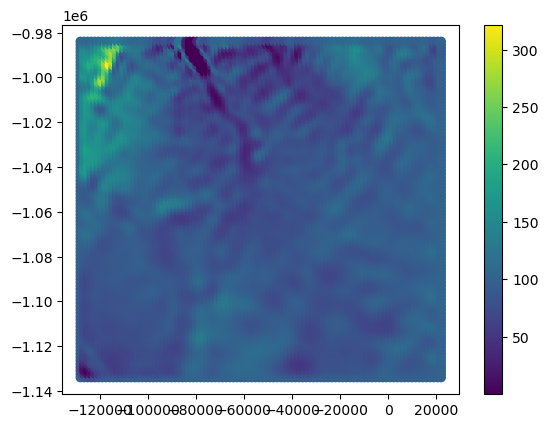

In [4]:
# Plotting attempts

# Show results
# experiment.plot_predictions(X_ref=experiment.model_data.data["ISSM"].X_dict, sol_ref=experiment.model_data.data["ISSM"].data_dict)

# pinn.utils.plotting.plot_data(experiment.model_data.data["ISSM"].X_dict['x'],experiment.model_data.data["ISSM"].X_dict['y'], experiment.model_data.data["ISSM"].data_dict['u'])

plt.scatter(experiment.model_data.data["ISSM"].X_dict['x'], experiment.model_data.data["ISSM"].X_dict['y'], c=experiment.model_data.data["ISSM"].data_dict['C'], cmap='viridis')
plt.colorbar()